# Deep Learning for Image Classification Assessment


Welcome to your assessment! Follow the instructions in bold below to complete the assessment.

If you get stuck, check out the solutions video and notebook. (Make sure to run the solutions notebook before posting a question to the QA forum please, thanks!)

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [1]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 4s 1us/step


## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [8]:
import matplotlib.pyplot as plt
# Define class labels
class_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}


In [9]:
# Choose an index to visualize
index = 0

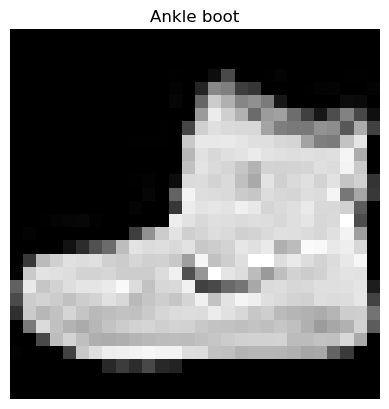

In [10]:
# Display the image
plt.imshow(x_train[index], cmap='gray')
plt.title(class_labels[y_train[index]])
plt.axis('off')
plt.show()

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

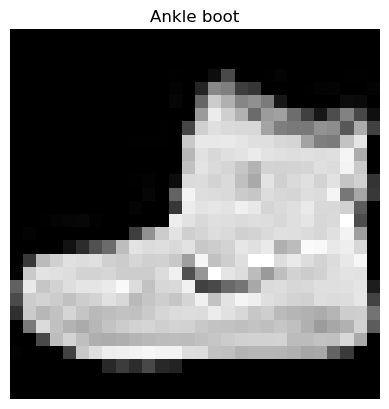

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Normalize the X train and X test data
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

# Reshape the X arrays to include a 4th dimension for the single channel
x_train_reshaped = x_train_normalized[..., np.newaxis]
x_test_reshaped = x_test_normalized[..., np.newaxis]

# Choose an index to visualize
index = 0

# Display the image
plt.imshow(x_train_normalized[index], cmap='gray')  # Display normalized image
plt.title(class_labels[y_train[index]])
plt.axis('off')
plt.show()


**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [15]:
import numpy as np

# Reshape the X arrays to include a 4th dimension for the single channel
x_train_reshaped = np.expand_dims(x_train_normalized, axis=-1)
x_test_reshaped = np.expand_dims(x_test_normalized, axis=-1)


**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [16]:
from keras.utils import to_categorical

# Convert y_train and y_test to one-hot encoded format
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)


## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create the model
model = Sequential()

# Add layers
model.add(Conv2D(filters=32, kernel_size=(4, 4), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Print model summary
model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [18]:
# Train the model
history = model.fit(x_train_reshaped, y_train_one_hot, epochs=10, batch_size=32)


Epoch 1/10


1875/1875 [==============================] - 29s 14ms/step - loss: 0.4169 - accuracy: 0.8502
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2843 - accuracy: 0.8965
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2418 - accuracy: 0.9139
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2145 - accuracy: 0.9215
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1909 - accuracy: 0.9304
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1724 - accuracy: 0.9377
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1567 - accuracy: 0.9443
Epoch 8/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1421 - accuracy: 0.9486
Epoch 9/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1296 - accuracy: 0.9534
Epoch 10/10
1875/1875 [==============================] - 27s 1

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [19]:
model.layers
model.metrics_names

['loss', 'accuracy']

In [21]:
model.evaluate(x_train_reshaped ,  y_train_one_hot)

1875/1875 [==============================] - 9s 5ms/step - loss: 0.0976 - accuracy: 0.9653


[0.09756345301866531, 0.965316653251648]

In [22]:
from sklearn.metrics import classification_report

In [23]:
import numpy as np

In [24]:
prediction = model.predict(x_test)
prediction_classes = np.argmax(prediction, axis=1)

313/313 [==============================] - 2s 5ms/step


In [25]:
report = classification_report(y_test ,prediction_classes)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1000
           1       1.00      0.96      0.98      1000
           2       0.90      0.73      0.81      1000
           3       0.85      0.92      0.88      1000
           4       0.69      0.92      0.79      1000
           5       0.96      0.98      0.97      1000
           6       0.71      0.70      0.71      1000
           7       0.97      0.93      0.95      1000
           8       0.99      0.94      0.97      1000
           9       0.95      0.98      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



# Great Job!